# Problem Statement

# Load the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Laod the Datset

In [4]:
house=pd.read_csv("C:/Users/Laptop House/Data Science Intern/Intern Projects/House_Price_Prediction/Dataset/kc_house_data.csv")

# Top 5 Records

In [5]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Last 5 Rescords

In [6]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


**Remove the unecessary and quasi constant columns**

# Quasi-Constant Columns
**Those columns whose value can't the whole data**

In [7]:
house.drop(columns=['id','date','waterfront','view','yr_renovated','zipcode','yr_built'],inplace=True)

In [8]:
house.sample(30)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
17877,299000.0,3,2.50,1620,79993,1.0,4,6,1620,0,47.2138,-121.982,1620,15680
14950,295000.0,3,1.50,850,2500,1.0,3,7,850,0,47.5677,-122.360,850,5000
11108,1105000.0,5,3.25,3070,5000,2.0,3,9,2050,1020,47.6742,-122.356,2070,5000
18228,250000.0,2,1.00,1110,26051,1.0,3,6,1110,0,47.4711,-122.291,2240,12255
14502,925000.0,5,3.00,3850,9457,2.0,4,9,2910,940,47.7270,-122.362,2830,9608
864,280000.0,4,2.50,2050,7416,2.0,3,8,2050,0,47.2658,-122.219,2050,7920
2969,855000.0,3,2.25,3440,10628,2.0,3,10,3440,0,47.5647,-122.108,3170,11434
18559,382000.0,2,2.00,1350,2560,1.0,4,8,1350,0,47.6338,-122.106,1800,2560
3251,530000.0,4,2.50,2940,35996,2.0,3,9,2940,0,47.3401,-122.067,2890,35089
4589,1200000.0,5,2.50,2860,4000,2.0,4,8,2160,700,47.6225,-122.318,1340,1224


# Data Preprocessing

**1-** shape of the data

**2-** Data types

**3-** Null values

**4-** Duplicates

**5-** Statistical Summary

# Shape 

In [9]:
house.shape

(21613, 14)

**DataSet contain 21613 rows and 19 columns**

# Datatypes

In [10]:
house.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Null values

In [11]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**There is no null values in this dataset**

# Duplicates

In [12]:
house.duplicated().sum()

6

In [13]:
house.drop_duplicates(inplace=True)

In [14]:
house.duplicated().sum()

0

**Now There are no duplicates records**

# Statistical Summary 

In [15]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.400940e+05,3.370945,2.114697,2079.952006,1.511025e+04,1.494099,3.409497,7.656639,1788.411996,291.540010,47.560050,-122.213904,1986.569121,12770.634239
std,3.671725e+05,0.930121,0.770233,918.526493,4.142577e+04,0.539879,0.650791,1.175508,828.160213,442.622393,0.138581,0.140827,685.434228,27307.529388
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


# Conculssion
**1-** One house contain 33 bedrooms and 8 bathroom so these are the outliers so we can drop this house

In [16]:
house=house[~(house['bedrooms']==33)]

In [17]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,5.400894e+05,3.369573,2.114714,2079.973294,1.511067e+04,1.494122,3.409423,7.656669,1788.446635,291.526659,47.560044,-122.213898,1986.599509,12771.007776
std,3.671804e+05,0.908036,0.770247,918.542420,4.142668e+04,0.539882,0.650716,1.175527,828.163726,442.628286,0.138582,0.140828,685.435535,27308.106150
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,47.470825,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.750000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21606 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21606 non-null  float64
 1   bedrooms       21606 non-null  int64  
 2   bathrooms      21606 non-null  float64
 3   sqft_living    21606 non-null  int64  
 4   sqft_lot       21606 non-null  int64  
 5   floors         21606 non-null  float64
 6   condition      21606 non-null  int64  
 7   grade          21606 non-null  int64  
 8   sqft_above     21606 non-null  int64  
 9   sqft_basement  21606 non-null  int64  
 10  lat            21606 non-null  float64
 11  long           21606 non-null  float64
 12  sqft_living15  21606 non-null  int64  
 13  sqft_lot15     21606 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.5 MB


# Exploratory Data Analysis

### Univariate Analysis

In [19]:
house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,3,7,1180,0,47.5112,-122.257,1340,5650


# Numerical Col

## Price

**Function for ploting graph**

In [20]:
def distrubution(col):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
    ax1.set_title(f"Distrubution Of {col}")
    sns.histplot(house[col],ax=ax1)

    ax2.set_title(f"Distrubution Of {col}")
    sns.kdeplot(house[col],ax=ax2)

    ax3.set_title(f"Distrubution Of {col}")
    sns.boxplot(house[col],ax=ax3)
    plt.show()

In [21]:
house['price'].describe()

count    2.160600e+04
mean     5.400894e+05
std      3.671804e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

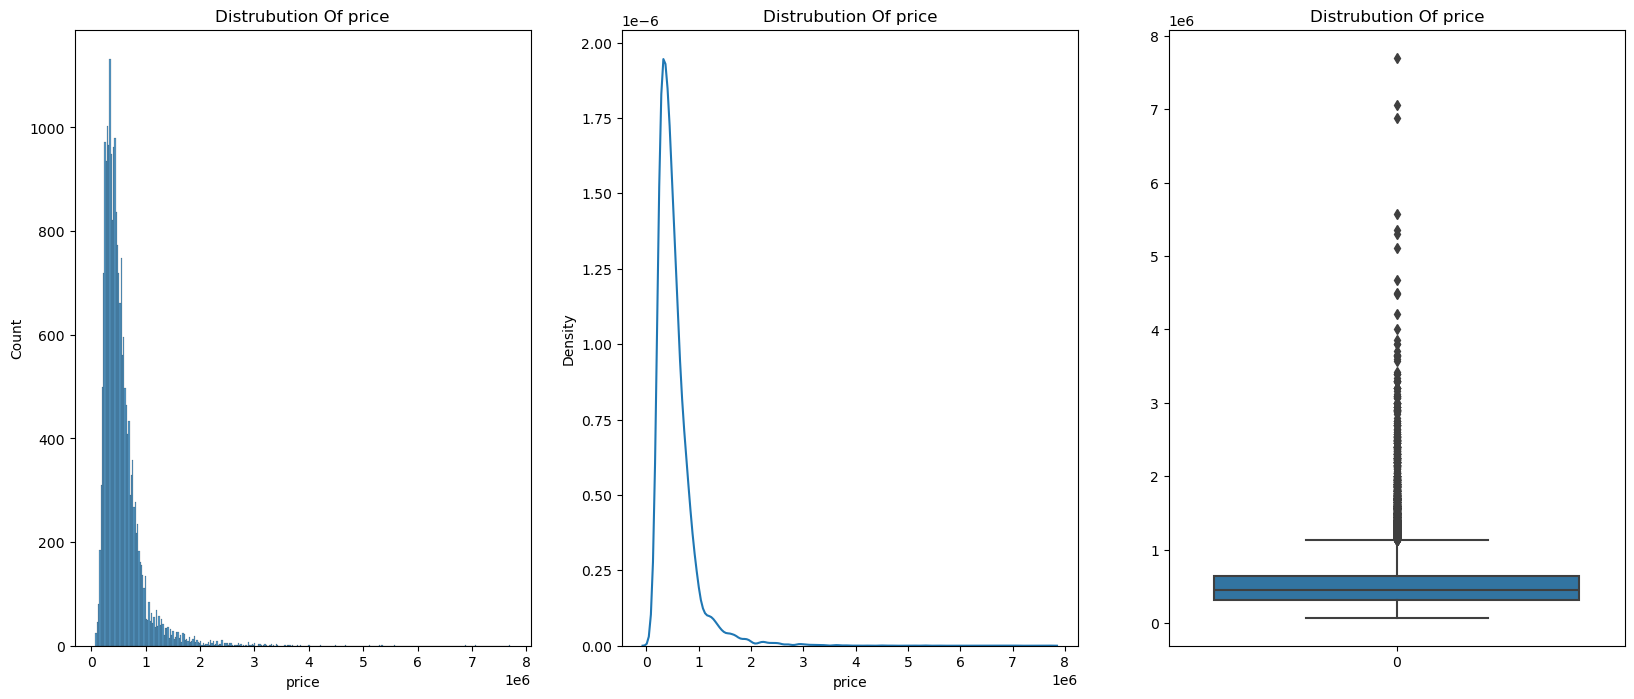

In [22]:
distrubution('price')

In [23]:
house['price'].skew()

4.023633391473413

<Axes: xlabel='price', ylabel='Count'>

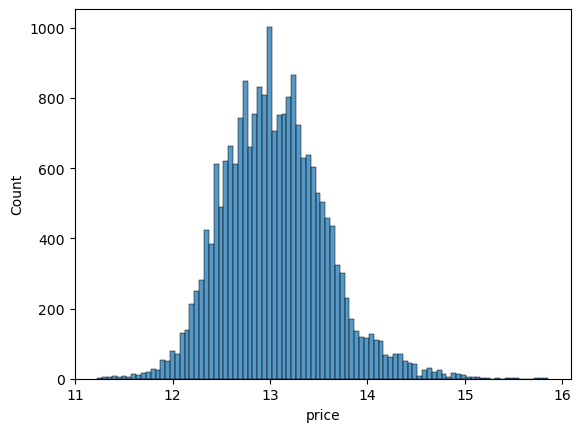

In [24]:
sns.histplot(house['price'].apply(np.log1p))

# Conclussion
**we can see that there is a lot of outlier we can remove the outluier using `winserization` technique and data is right skewed but after applyting the `np.log1p` transformation data should be normally distrubuted**

# Handling Outlier

In [25]:
from scipy.stats import mstats
# Winsorize the column
def handle_outlier(col):
    col=mstats.winsorize(house['price'].apply(np.log1p), limits=[0.05, 0.05])
    return col

# Demo of applying `Winserization`

<Axes: >

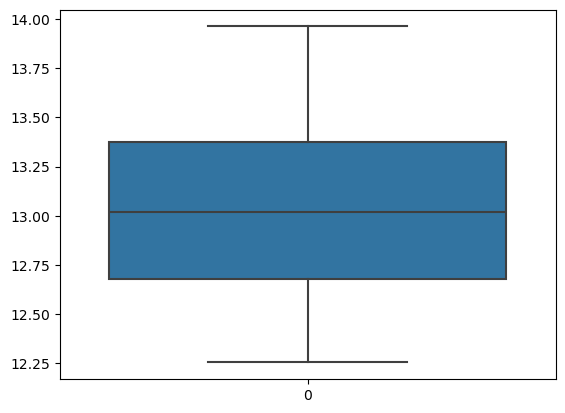

In [26]:
col=mstats.winsorize(house['price'].apply(np.log1p), limits=[0.05, 0.05])
sns.boxplot(col)

<Axes: ylabel='Count'>

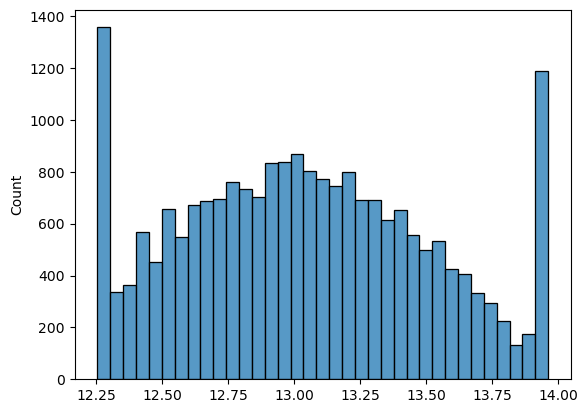

In [27]:
sns.histplot(col)

# Conclussion 
**1-** After removing the outluier  price col look like this

In [28]:
house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,3,7,1180,0,47.5112,-122.257,1340,5650


**1-** In this Dataset we have `sqrt_living` and `sqrt_living15` both show the size of the hosue.
**2-** So we can add new columns `total_sqrt_living`

In [29]:
house['total_sqft_living']=house['sqft_living']+house['sqft_living15']

**1-** similarly for `sqft_lot`
**2-** So we can add new columns `total_sqrt_lot`

In [30]:
house['tottal_sqft_lot']=house['sqft_lot']+house['sqft_lot15']

In [31]:
house.rename(columns={'tottal_sqft_lot':'total_sqft_lot'},inplace=True)

In [32]:
house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1180,5650,1.0,3,7,1180,0,47.5112,-122.257,1340,5650,2520,11300


# Drop the `sqft_living` `sqft_lot` and `sqft_living15` `sqft_lot15`

In [33]:
house.drop(columns=['sqft_living', 'sqft_lot','sqft_living15','sqft_lot15'],inplace=True)

In [34]:
house.head()

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881
2,180000.0,2,1.00,1.0,3,6,770,0,47.7379,-122.233,3490,18062
3,604000.0,4,3.00,1.0,5,7,1050,910,47.5208,-122.393,3320,10000
4,510000.0,3,2.00,1.0,3,8,1680,0,47.6168,-122.045,3480,15583


# sqft_above

In [32]:
house['sqft_above'].describe()

count    21606.000000
mean      1788.446635
std        828.163726
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

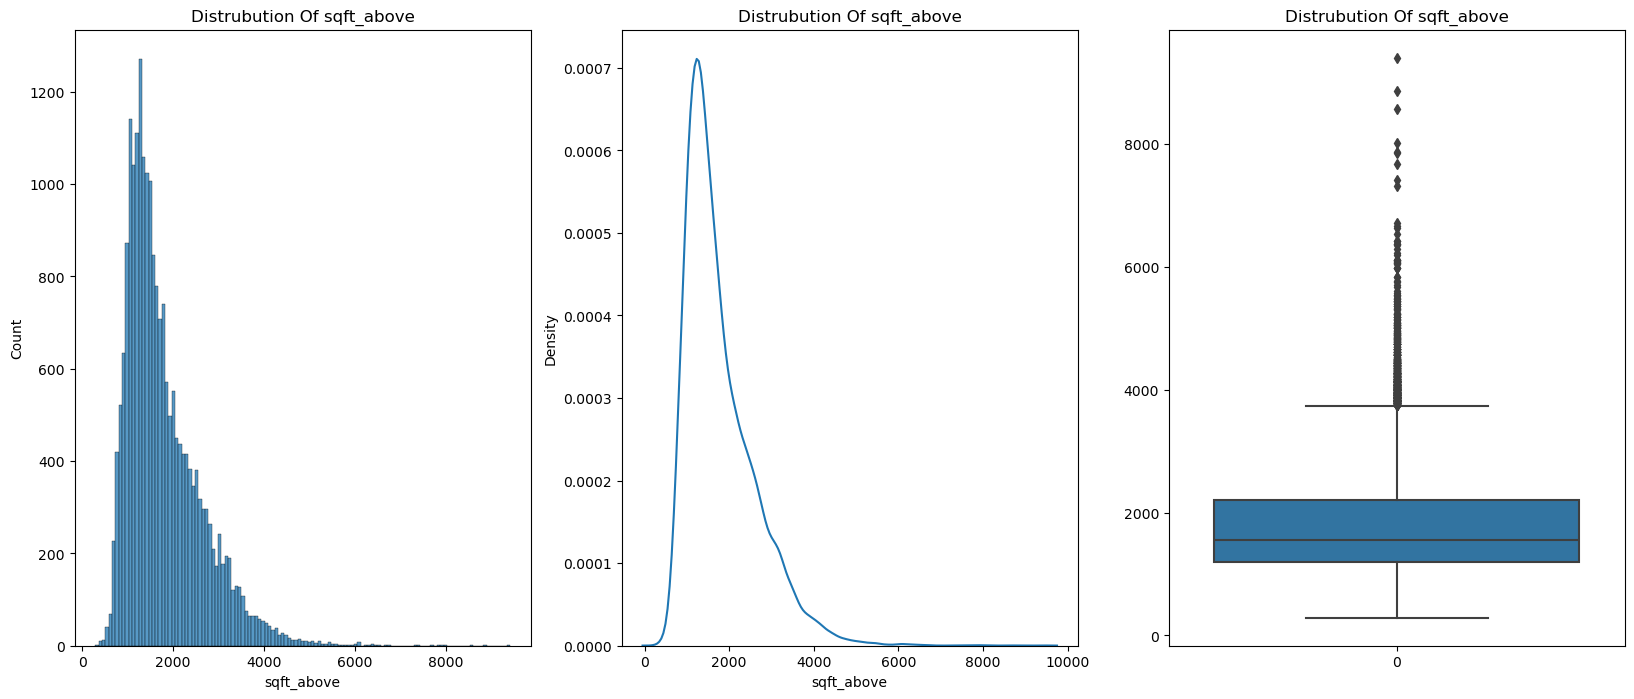

In [33]:
distrubution('sqft_above')

<Axes: xlabel='sqft_above', ylabel='Count'>

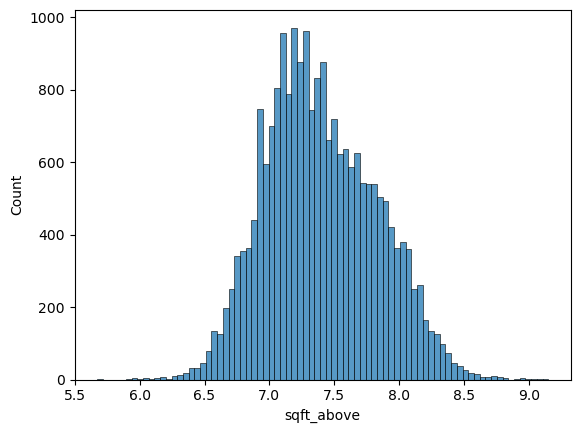

In [34]:
sns.histplot(house['sqft_above'].apply(np.log1p))

# Conclussion
**This column also contain certian outliers**

# Sqft_baement

In [35]:
house.head(1)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [36]:
house['sqft_basement'].describe()

count    21606.000000
mean       291.526659
std        442.628286
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

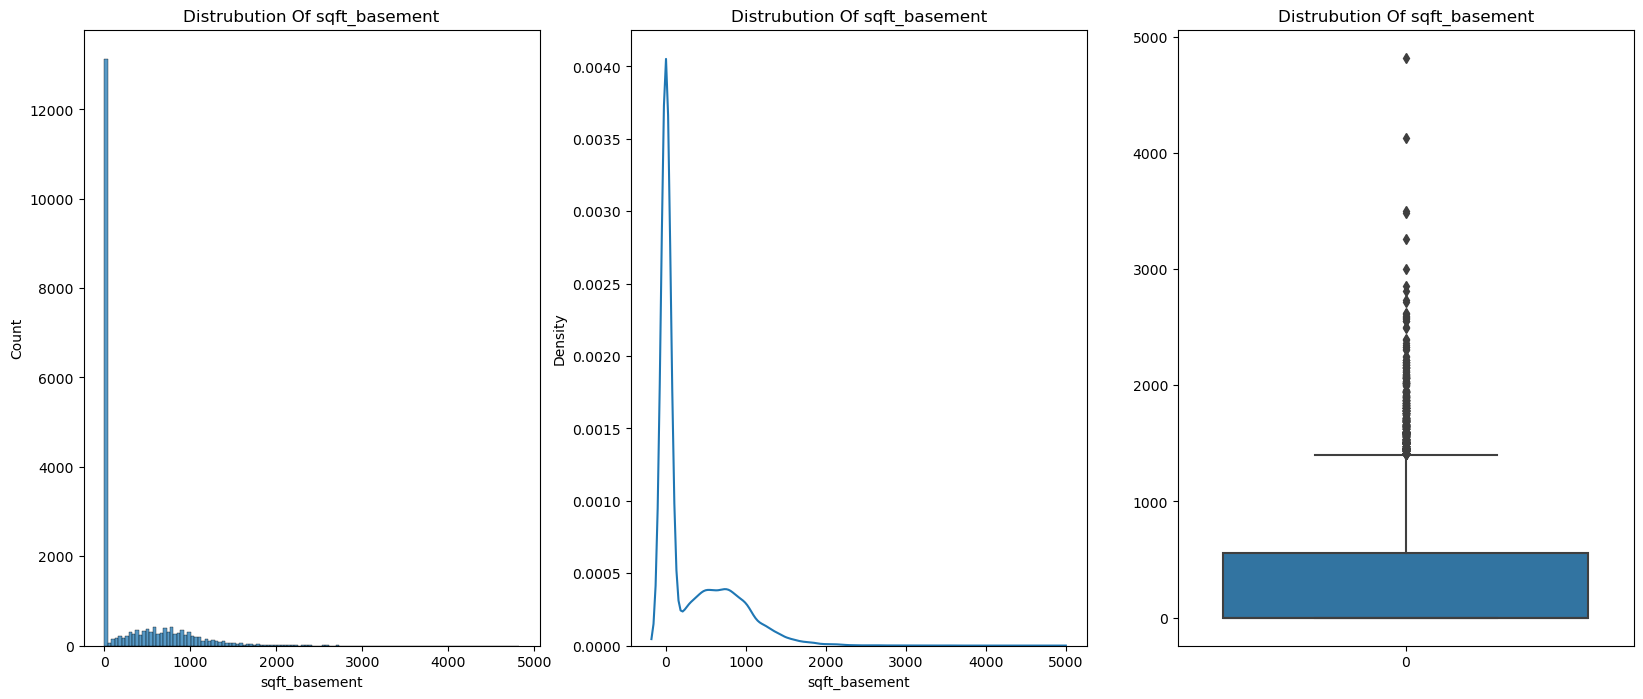

In [37]:
distrubution('sqft_basement')

<Axes: xlabel='sqft_above', ylabel='Count'>

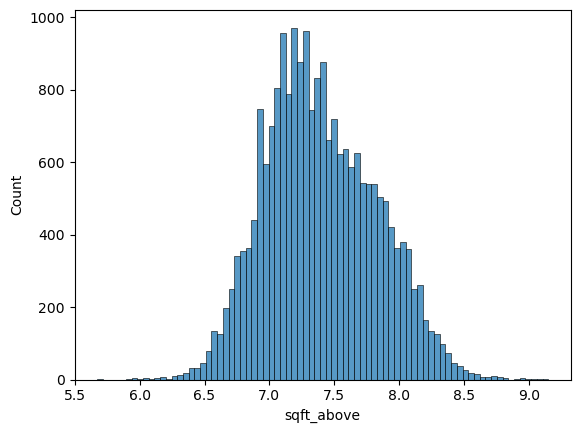

In [38]:
sns.histplot(house['sqft_above'].apply(np.log1p))

In [39]:
house[house['sqft_basement']==0].shape

(13123, 12)

In [40]:
house[~(house['sqft_basement']==0)].shape

(8483, 12)

# Conclussion
**1-** This column is also a quasi Constant columns b/c it contain lot of those value whose value can't be change.
**2-** 13126 rows contain 0 and 8486 rows contain the other values

# Latitude

In [41]:
house.head(2)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881


In [42]:
house['lat'].describe()

count    21606.000000
mean        47.560044
std          0.138582
min         47.155900
25%         47.470825
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

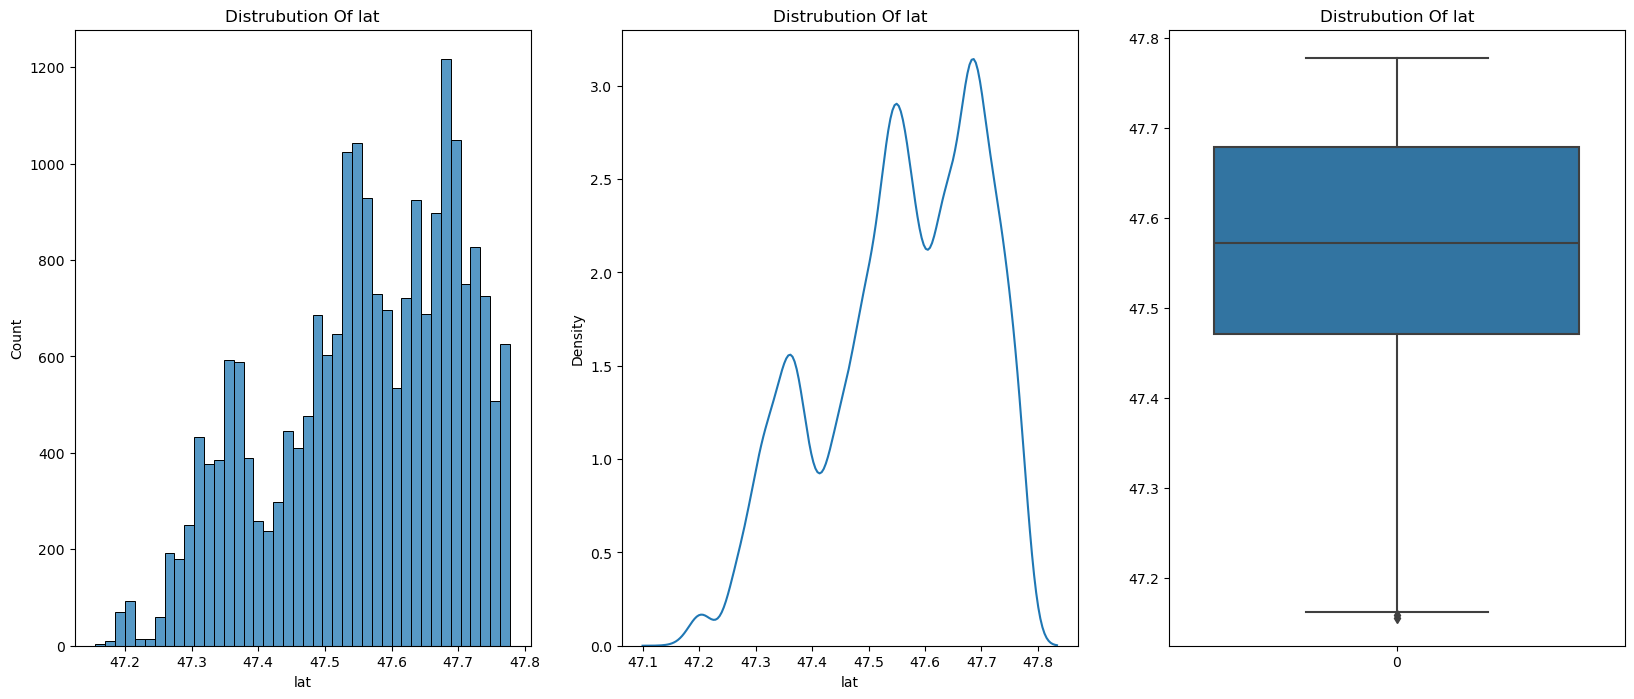

In [43]:
distrubution('lat')

# longitude

In [44]:
house['long'].describe()

count    21606.000000
mean      -122.213898
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230500
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

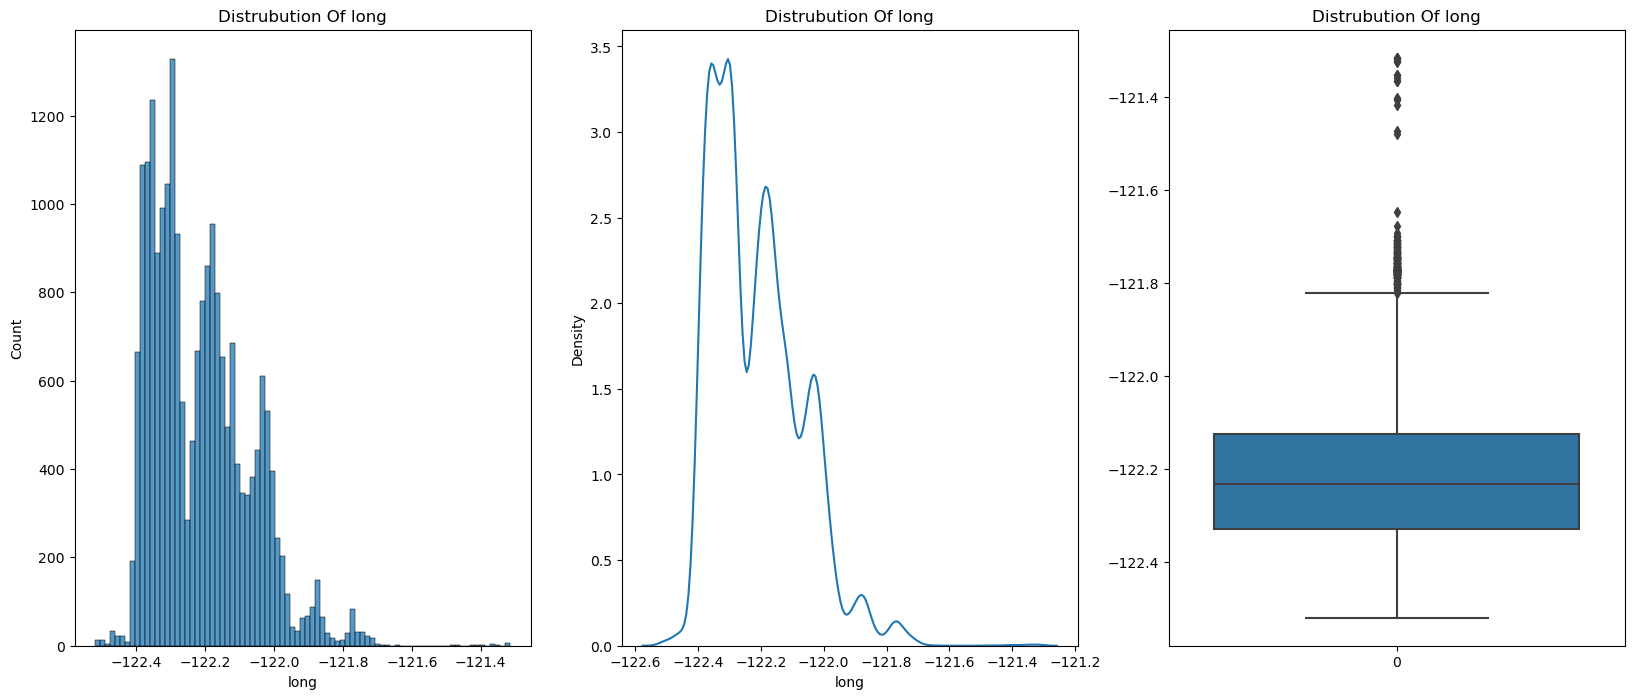

In [45]:
distrubution('long')

# total_sqft_living

In [46]:
house['total_sqft_living'].describe()

count    21606.000000
mean      4066.572804
std       1505.323788
min       1240.000000
25%       2960.000000
50%       3770.000000
75%       4870.000000
max      18390.000000
Name: total_sqft_living, dtype: float64

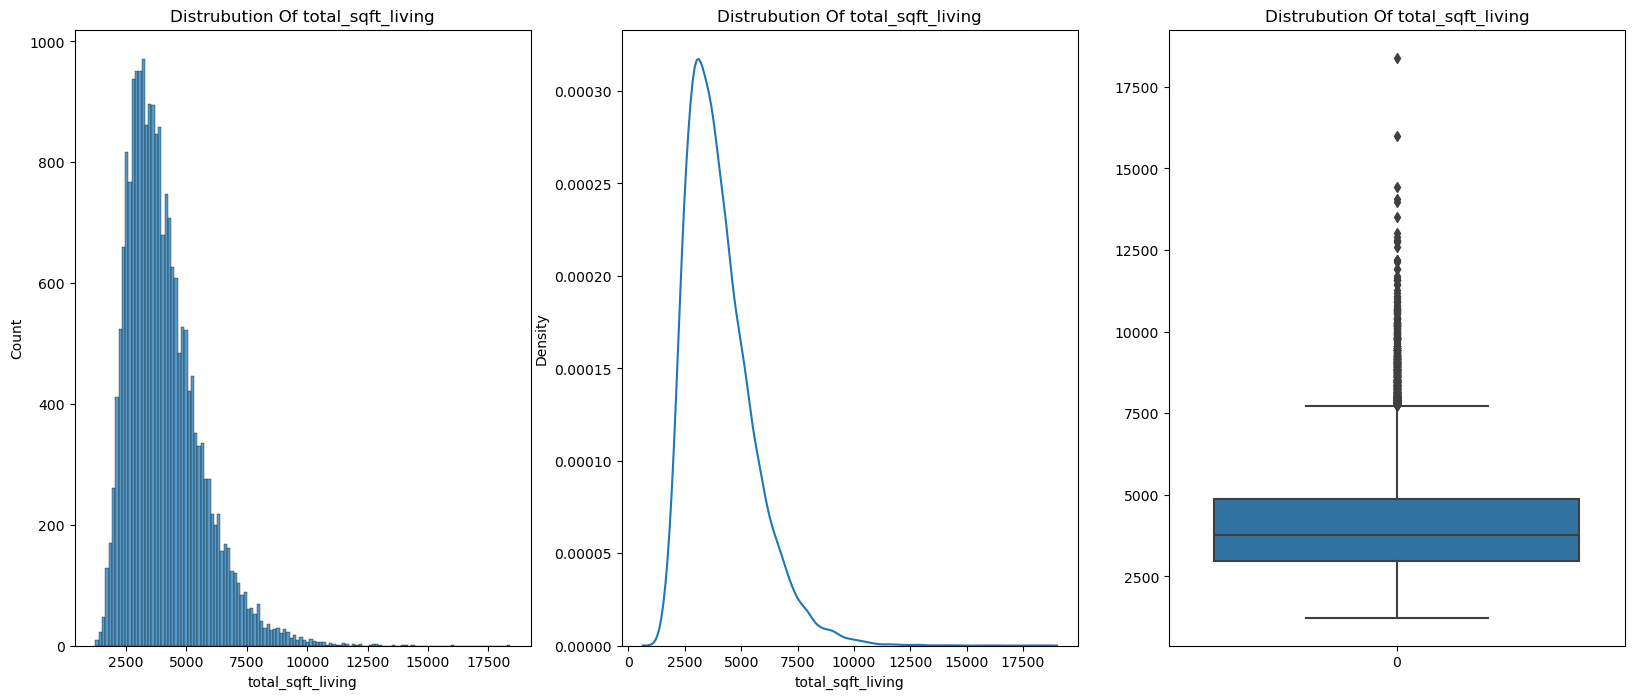

In [47]:
distrubution('total_sqft_living')

<Axes: xlabel='total_sqft_living', ylabel='Count'>

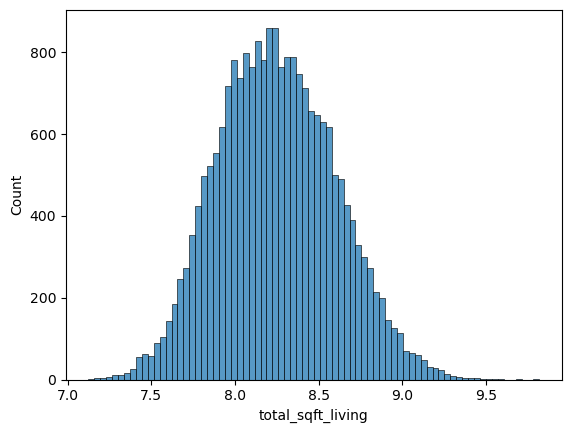

In [48]:
sns.histplot(house['total_sqft_living'].apply(np.log1p))

# total_sqft_lot

In [49]:
house.head(1)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [50]:
house['total_sqft_lot'].describe()

count    2.160600e+04
mean     2.788168e+04
std      6.393490e+04
min      1.438000e+03
25%      1.022050e+04
50%      1.537500e+04
75%      2.091600e+04
max      2.076940e+06
Name: total_sqft_lot, dtype: float64

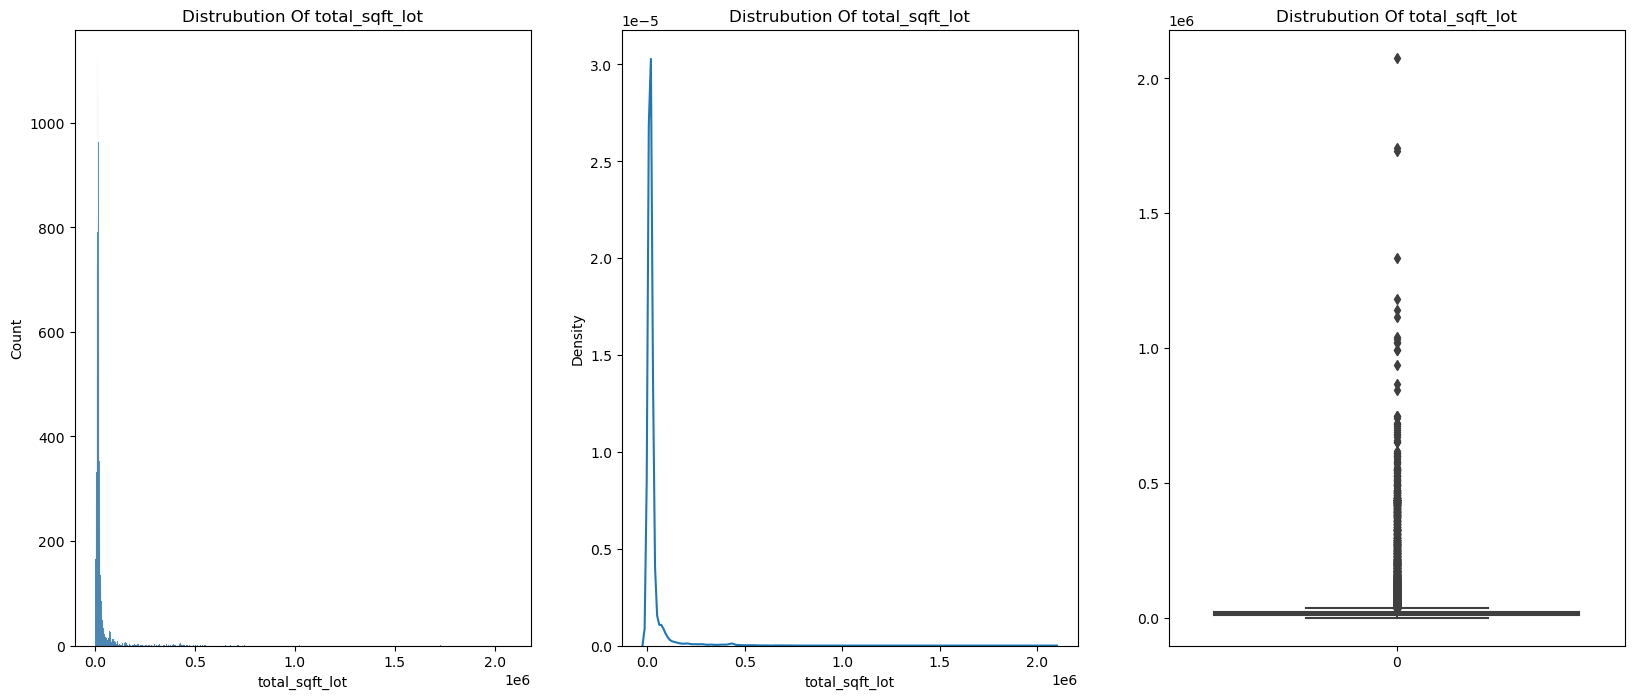

In [51]:
distrubution('total_sqft_lot')

# Conclussion
**This Columns conatain a lot of outlier so we can handle after check the correlation in bi variate analysis**

<Axes: xlabel='total_sqft_lot', ylabel='Count'>

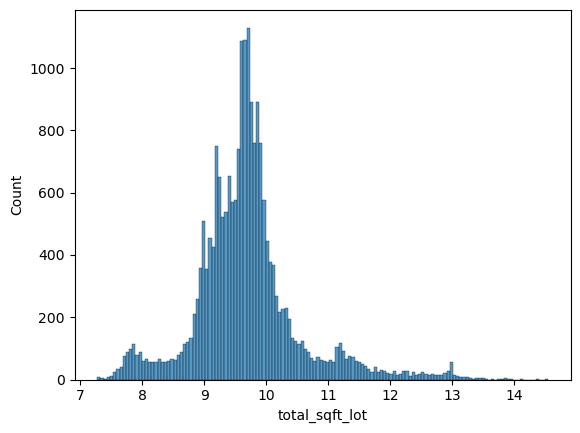

In [52]:
sns.histplot(house['total_sqft_lot'].apply(np.log1p))

# Cat-col

# Bedrooms

In [53]:
house.head(1)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [54]:
house['bedrooms'].value_counts()

bedrooms
3     9820
4     6881
2     2759
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64

**1-** we can see that there are `13 house` whose contain `0 bedroom` and `1 house` whos conatin 11 bedroom we will drop these rows

In [55]:
outliers=house[(house['bedrooms']==0) | (house['bedrooms']==11) | (house['bedrooms']==10) | (house['bedrooms']==9)].shape
print(outliers)

(23, 12)


**we can say that these are the outluiers**

In [56]:
house[(house['bedrooms']==0) | (house['bedrooms']==11) | (house['bedrooms']==10) | (house['bedrooms']==9)]

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
875,1095000.0,0,0.00,3.5,3,7,3064,0,47.6362,-122.322,5424,8764
3119,380000.0,0,0.00,3.0,3,8,1470,0,47.7145,-122.356,2940,2378
3467,288000.0,0,1.50,3.0,3,7,1430,0,47.7222,-122.290,2860,3300
4096,599999.0,9,4.50,2.5,3,7,2450,1380,47.6927,-122.338,5290,13279
4235,700000.0,9,3.00,2.0,3,7,2830,850,47.6374,-122.324,5640,6850
4868,228000.0,0,1.00,1.0,2,4,390,0,47.5260,-122.261,2560,11900
6079,1280000.0,9,4.50,2.0,3,8,2530,1120,47.6604,-122.289,6160,10000
6994,1295650.0,0,0.00,2.0,3,12,4810,0,47.6642,-122.069,9550,63069
8477,339950.0,0,2.50,2.0,3,8,2290,0,47.3473,-122.151,4790,17070
8484,240000.0,0,2.50,2.0,3,7,1810,0,47.3493,-122.053,3620,11354


**There are 23 house whose conatin `0,9,10,11 bedrooms` we will drop it**

In [57]:
house[~((house['bedrooms']==0) | (house['bedrooms']==11) | (house['bedrooms']==10) | (house['bedrooms']==9))].shape

(21583, 12)

In [58]:
house=house[~((house['bedrooms']==0) | (house['bedrooms']==11) | (house['bedrooms']==10) | (house['bedrooms']==9))]

In [59]:
house.head(1)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [60]:
house['bedrooms'].value_counts()

bedrooms
3    9820
4    6881
2    2759
5    1601
6     272
1     199
7      38
8      13
Name: count, dtype: int64

In [61]:
house['bedrooms'].value_counts(normalize=True)*100

bedrooms
3    45.498772
4    31.881573
2    12.783209
5     7.417875
6     1.260251
1     0.922022
7     0.176064
8     0.060233
Name: proportion, dtype: float64

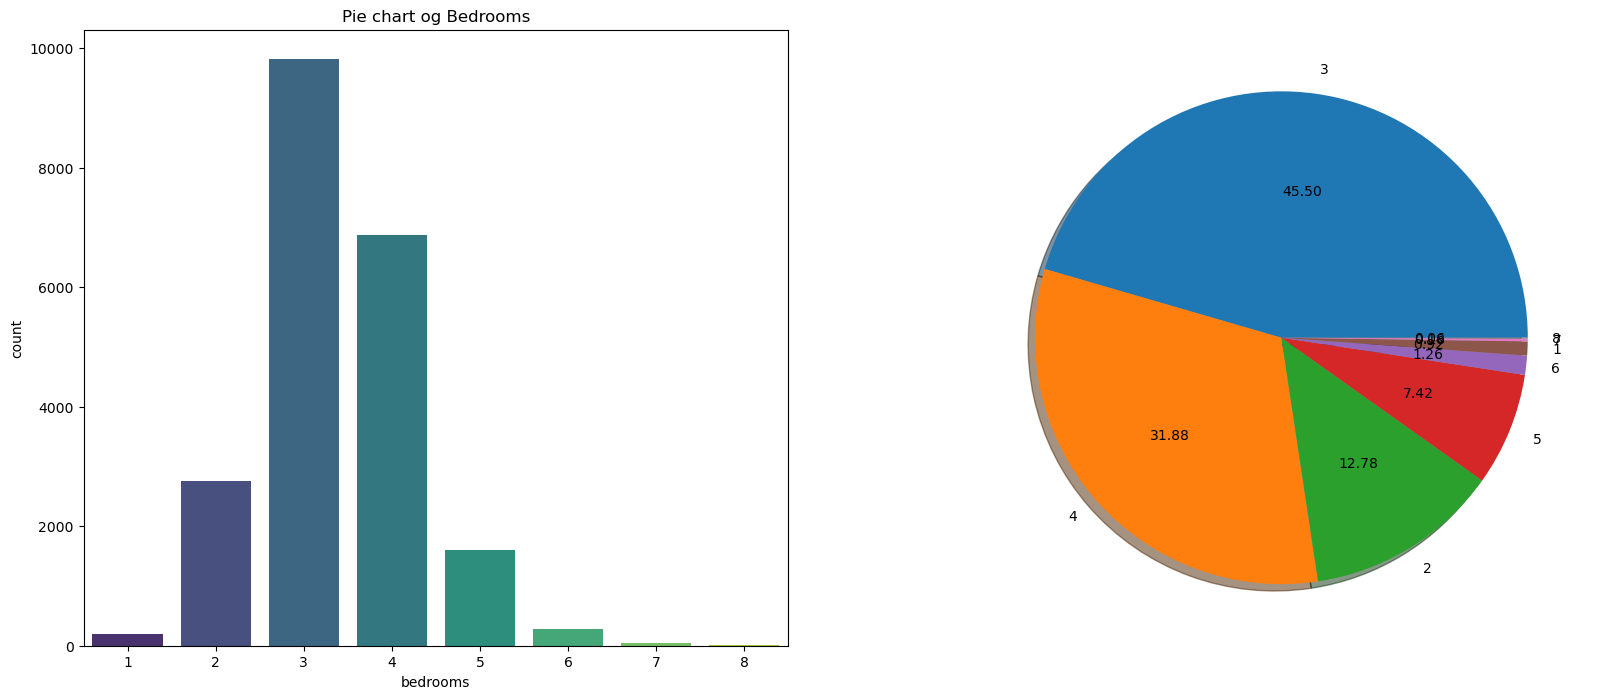

In [62]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
ax1.set_title("Bar chart og Bedrooms")
sns.barplot(data=house,
            x=house['bedrooms'].value_counts().index,
            y=house['bedrooms'].value_counts(),ax=ax1,palette="viridis")
ax1.grid()

ax1.set_title("Pie chart og Bedrooms")
plt.pie(house['bedrooms'].value_counts(),
        labels=house['bedrooms'].value_counts().index,autopct="%.2f",
        shadow=True
)
ax1.grid()

# Bathrooms

In [63]:
house.head(1)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [64]:
house['bathrooms'].value_counts()

bathrooms
2.50    5375
1.00    3851
1.75    3046
2.25    2046
2.00    1928
1.50    1445
2.75    1185
3.00     748
3.50     731
3.25     589
3.75     155
4.00     135
4.50      98
4.25      79
0.75      71
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
6.75       2
8.00       2
6.25       2
6.50       2
7.75       1
Name: count, dtype: int64

**We can see that each house contain a lot of bath rooms but we can get only those whose counts is `greatre than 50`**

In [65]:
outliers2=house[(house['bathrooms']==7.75) |(house['bathrooms']==6.50) |(house['bathrooms']==6.25) |(house['bathrooms']==0) |(house['bathrooms']==5.75) |(house['bathrooms']==0.50)| (house['bathrooms']==6.00) | (house['bathrooms']==1.25) | (house['bathrooms']==5.50) | (house['bathrooms']==5.25) | (house['bathrooms']==5.00)| (house['bathrooms']==4.75)].shape
print("House whose bathroom is less then 10 is => ",outliers2[0] ,"house")

House whose bathroom is less then 10 is =>  97 house


**we will drop these rows**

In [66]:
house[~(house['bathrooms']==7.75) |(house['bathrooms']==6.50) |(house['bathrooms']==6.25) |(house['bathrooms']==0) |(house['bathrooms']==5.75) |(house['bathrooms']==0.50)| (house['bathrooms']==6.00) | (house['bathrooms']==1.25) | (house['bathrooms']==5.50) | (house['bathrooms']==5.25) | (house['bathrooms']==5.00)| (house['bathrooms']==4.75)].shape

(21582, 12)

In [67]:
house=house[~(house['bathrooms']==7.75) |(house['bathrooms']==6.50) |(house['bathrooms']==6.25) |(house['bathrooms']==0) |(house['bathrooms']==5.75) |(house['bathrooms']==0.50)| (house['bathrooms']==6.00) | (house['bathrooms']==1.25) | (house['bathrooms']==5.50) | (house['bathrooms']==5.25) | (house['bathrooms']==5.00)| (house['bathrooms']==4.75)]

In [68]:
house.shape

(21582, 12)

In [2]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
ax1.set_title("Bar chart og Bedrooms")
sns.barplot(data=house,
            x=house['bathrooms'][:15].value_counts().index,
            y=house['bathrooms'][:15].value_counts(),ax=ax1,palette="viridis")
ax1.grid()

ax1.set_title("Pie chart og Bedrooms")
plt.pie(house['bathrooms'][:15].value_counts(),
        labels=house['bathrooms'][:15].value_counts().index,autopct="%.2f",
        shadow=True
)
ax1.grid()
plt.xticks(rotation='vertical')

NameError: name 'plt' is not defined

In [70]:
house.head(2)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881


# Floor

In [71]:
house['floors'].value_counts()

floors
1.0    10674
2.0     8223
1.5     1910
3.0      610
2.5      158
3.5        7
Name: count, dtype: int64

In [72]:
house=house[~(house['floors']==3.5)]

In [73]:
house['floors'].value_counts()

floors
1.0    10674
2.0     8223
1.5     1910
3.0      610
2.5      158
Name: count, dtype: int64

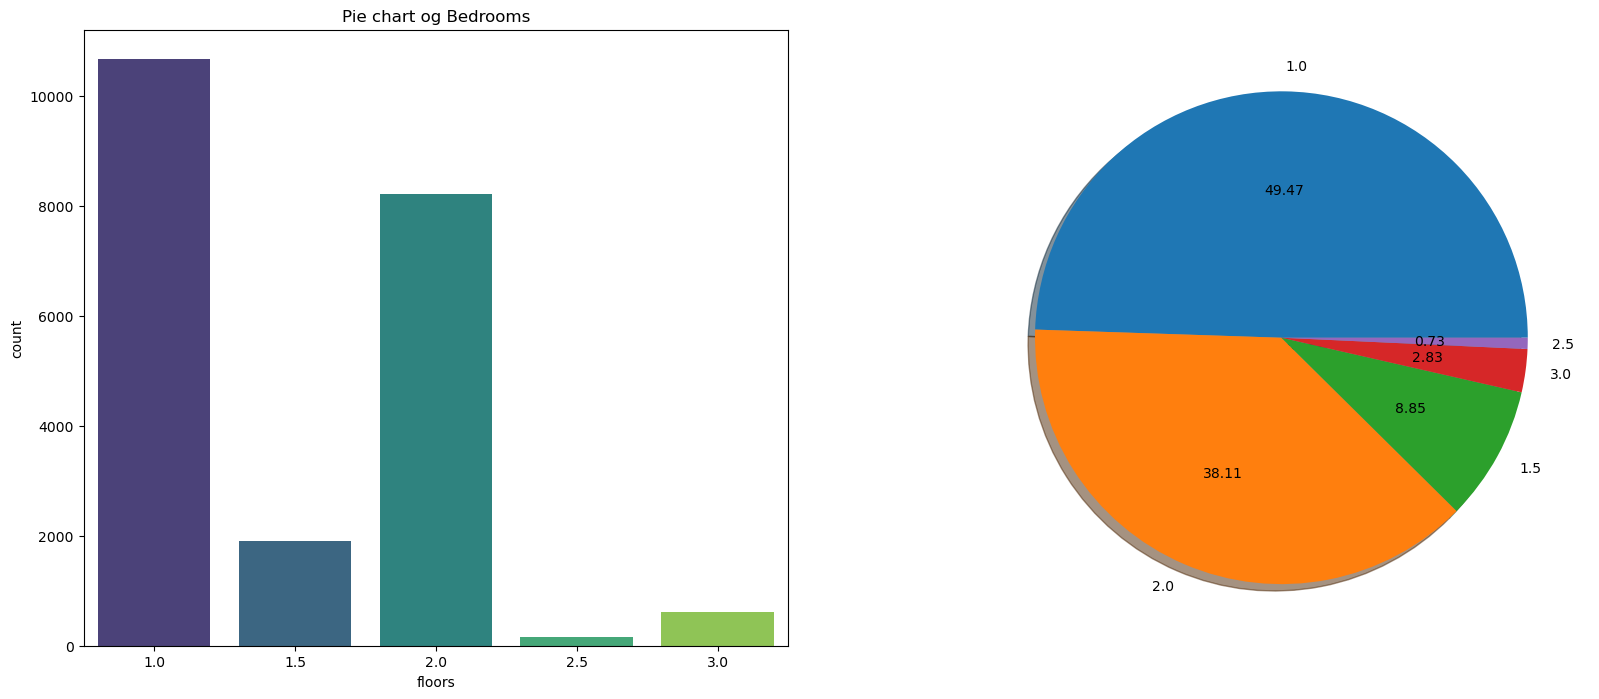

In [74]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
ax1.set_title("Bar chart og Bedrooms")
sns.barplot(data=house,
            x=house['floors'].value_counts().index,
            y=house['floors'].value_counts(),ax=ax1,palette="viridis")
ax1.grid()

ax1.set_title("Pie chart og Bedrooms")
plt.pie(house['floors'].value_counts(),
        labels=house['floors'].value_counts().index,autopct="%.2f",
        shadow=True
)
ax1.grid()

# Bivariate Analysis

## Num-Num Col 

In [75]:
house.head(2)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881


# Price vs sqft_above

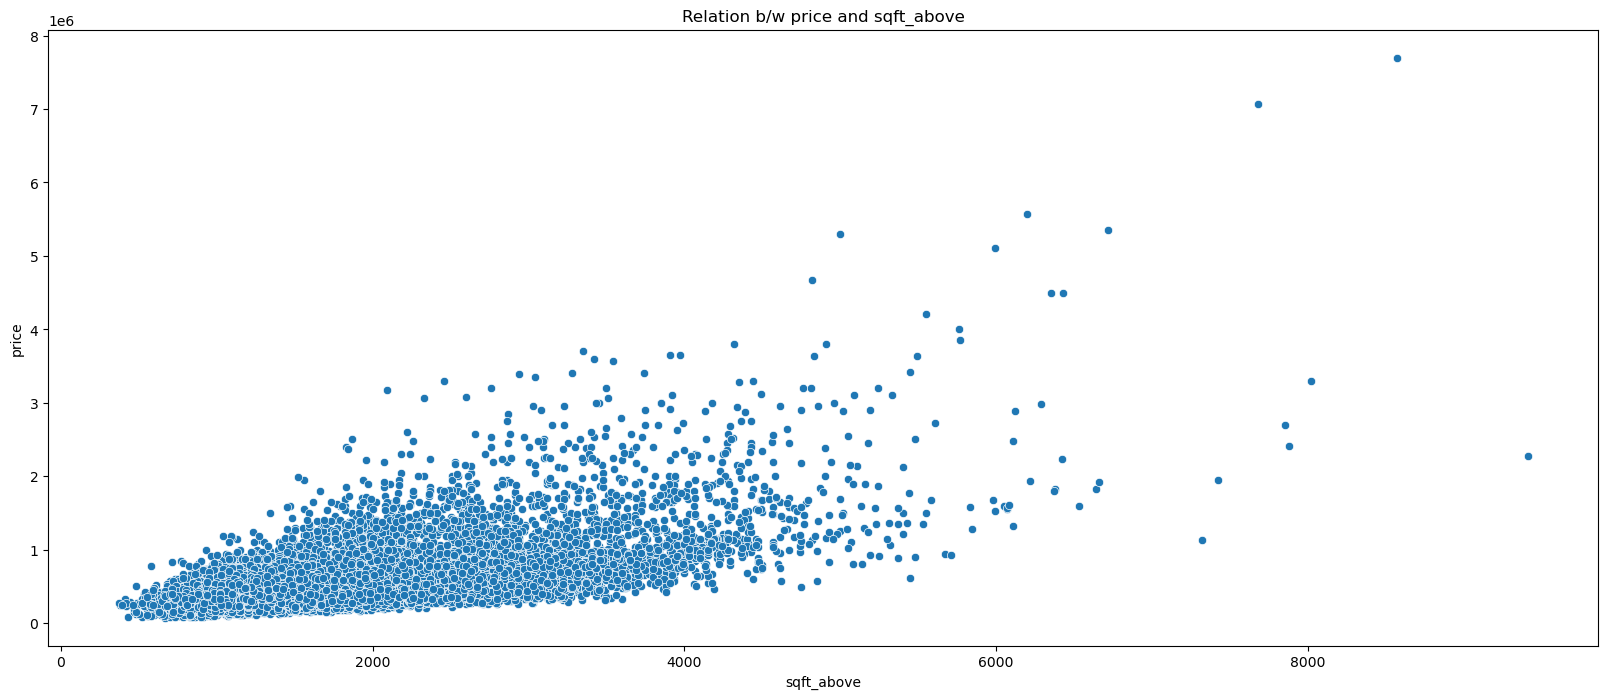

In [76]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Relation b/w price and sqft_above')
sns.scatterplot(data=house,x='sqft_above',y='price',ax=ax1)
plt.show()

# Conclussion
**1-** we can see that there is a sort of linear relation b/w price and sqft_above

# Sqft_above vs Sqft_basement

In [77]:
house.head(2)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881


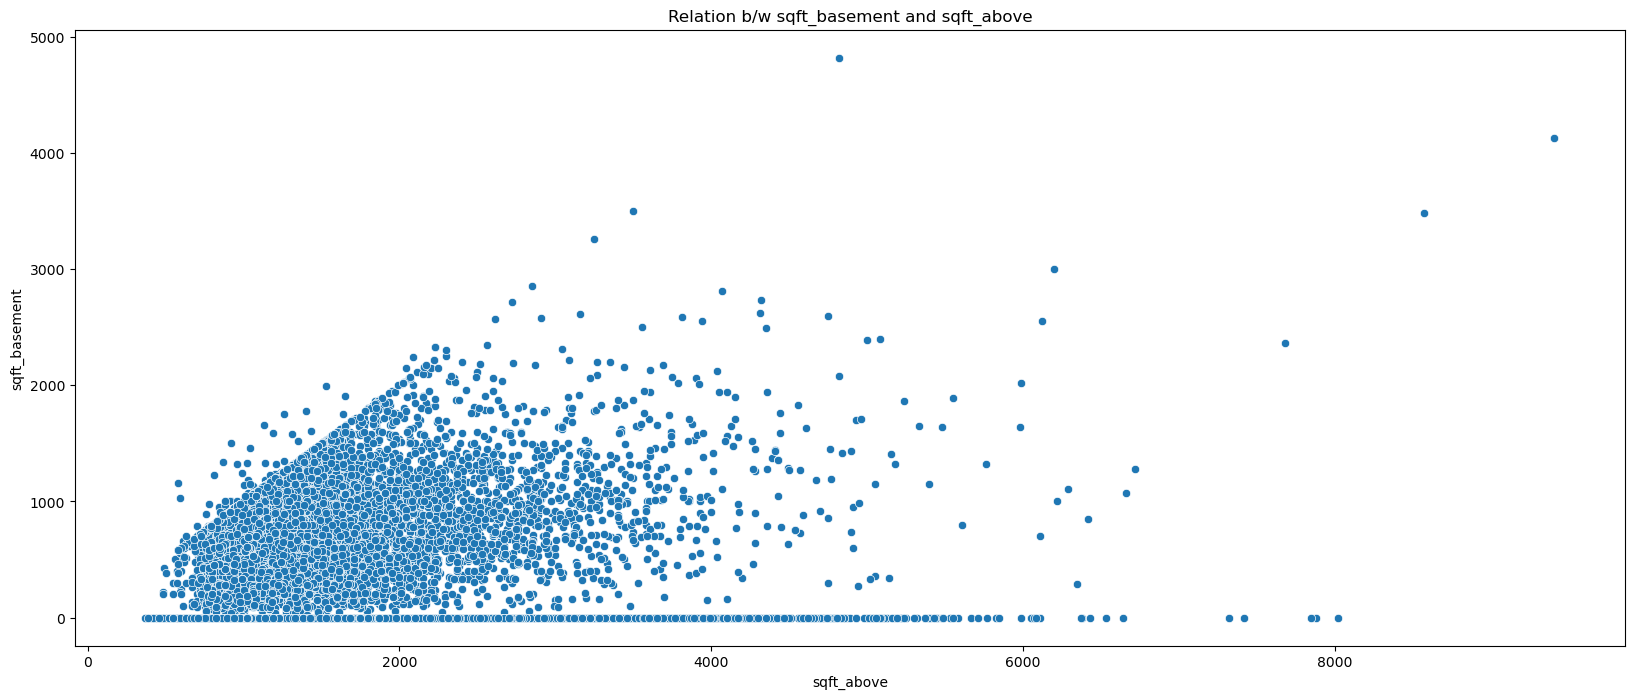

In [78]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Relation b/w sqft_basement and sqft_above')
sns.scatterplot(data=house,x='sqft_above',y='sqft_basement',ax=ax1)
plt.show()

# Conclussion
**1-** we can see that there is a sort of linear relation b/w price and sqft_above

# total_sqft_living vs Price

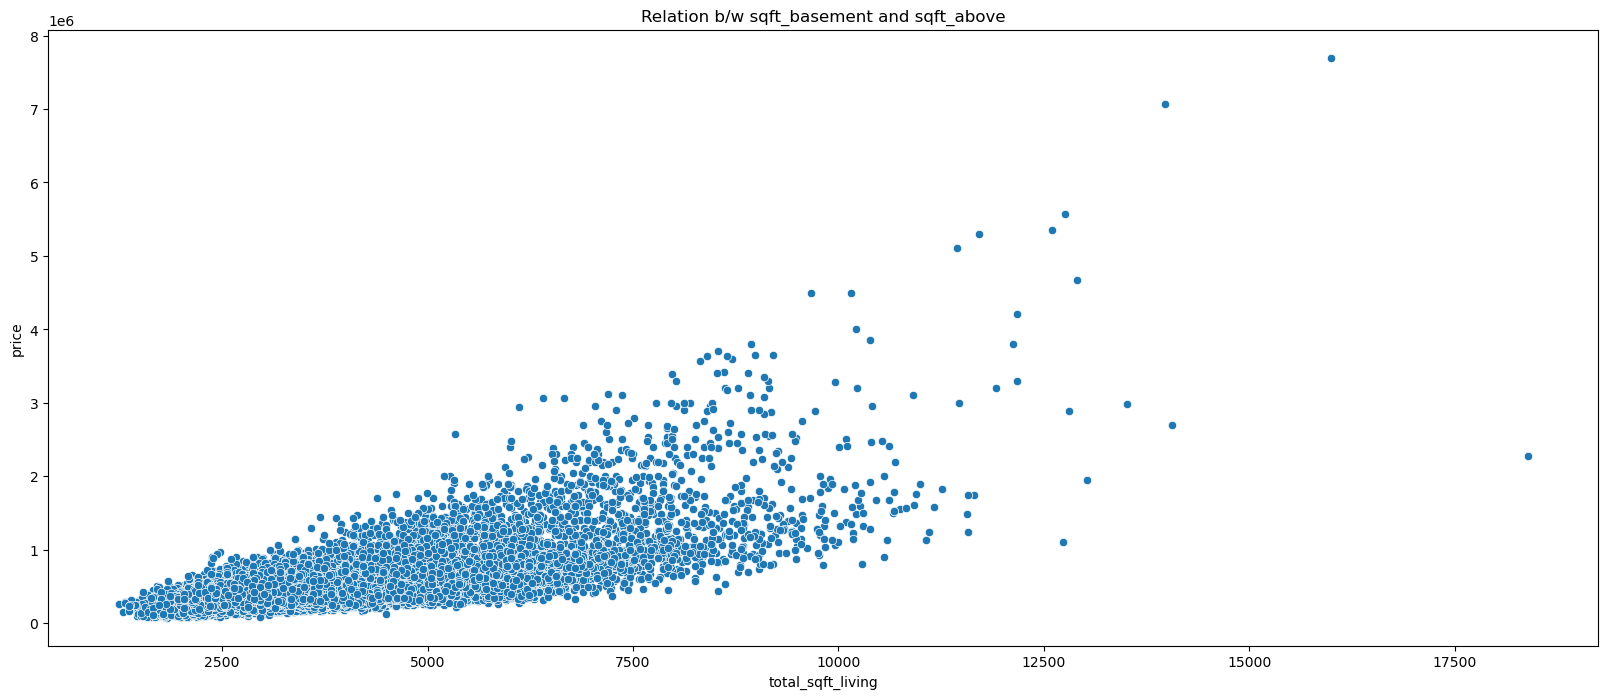

In [79]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Relation b/w sqft_basement and sqft_above')
sns.scatterplot(data=house,x='total_sqft_living',y='price',ax=ax1)
plt.show()

# Conclussion
**1-** we can see that there is a sort of linear relation b/w price and sqft_above

# price vs Sqft_above

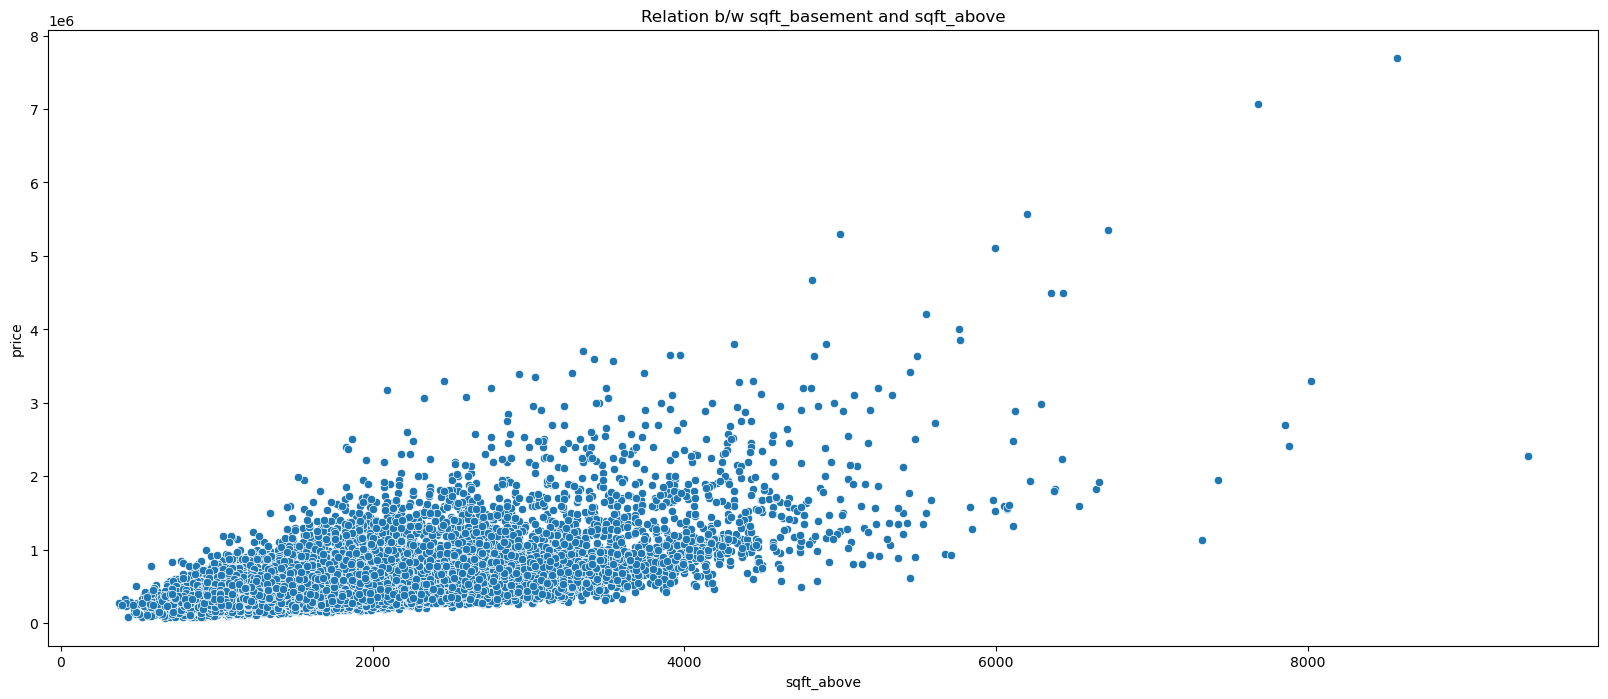

In [80]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Relation b/w sqft_basement and sqft_above')
sns.scatterplot(data=house,x='sqft_above',y='price',ax=ax1)
plt.show()

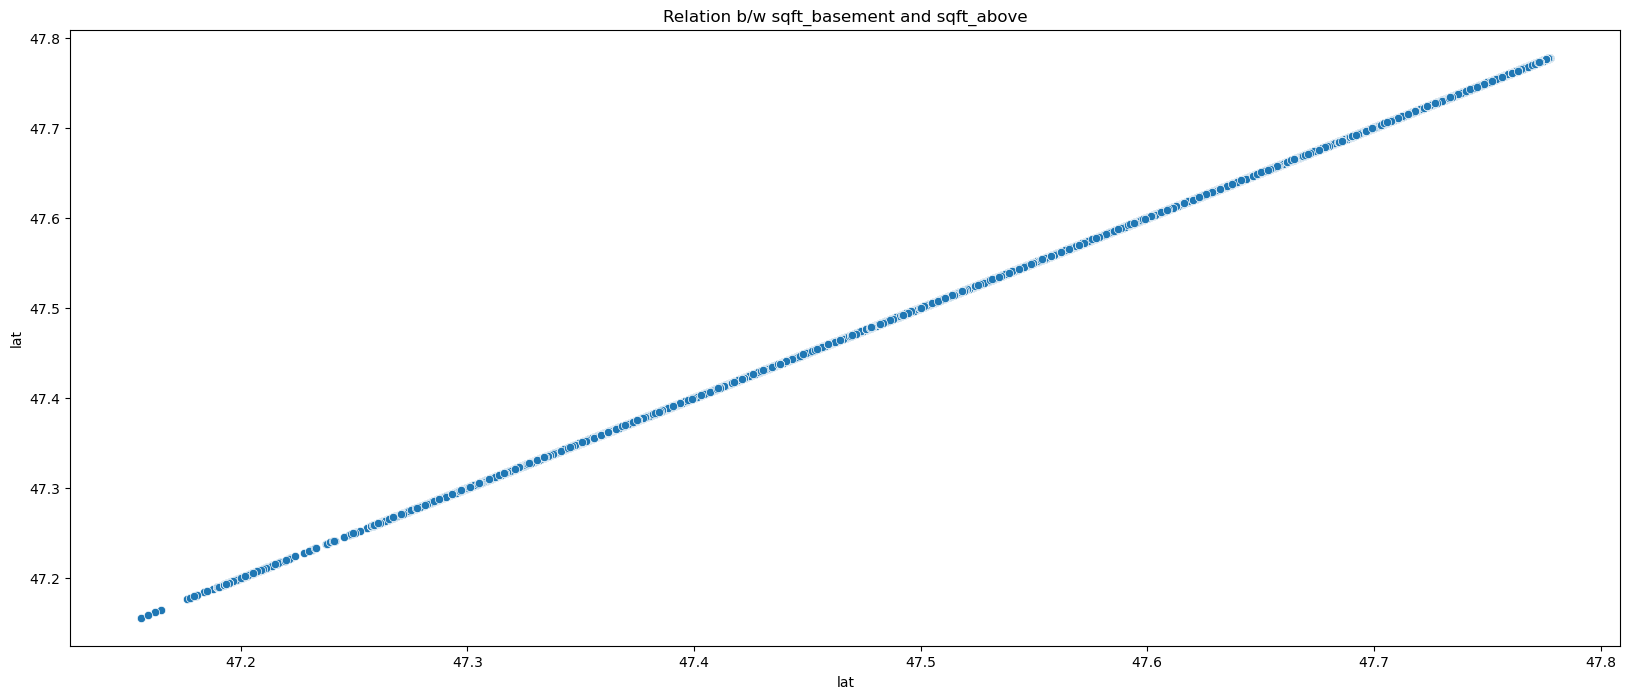

In [81]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Relation b/w sqft_basement and sqft_above')
sns.scatterplot(data=house,x='lat',y='lat',ax=ax1)
plt.show()

# Bivariate Analysis

In [82]:
house.head(2)

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,221900.0,3,1.00,1.0,3,7,1180,0,47.5112,-122.257,2520,11300
1,538000.0,3,2.25,2.0,3,7,2170,400,47.7210,-122.319,4260,14881


In [83]:
temp_df=house.groupby(['bedrooms'])['price'].median().reset_index()
temp_df

,bedrooms,price
0,1,299000.0
1,2,374000.0
2,3,412500.0
3,4,549995.0
4,5,620000.0
5,6,650000.0
6,7,728580.0
7,8,690000.0


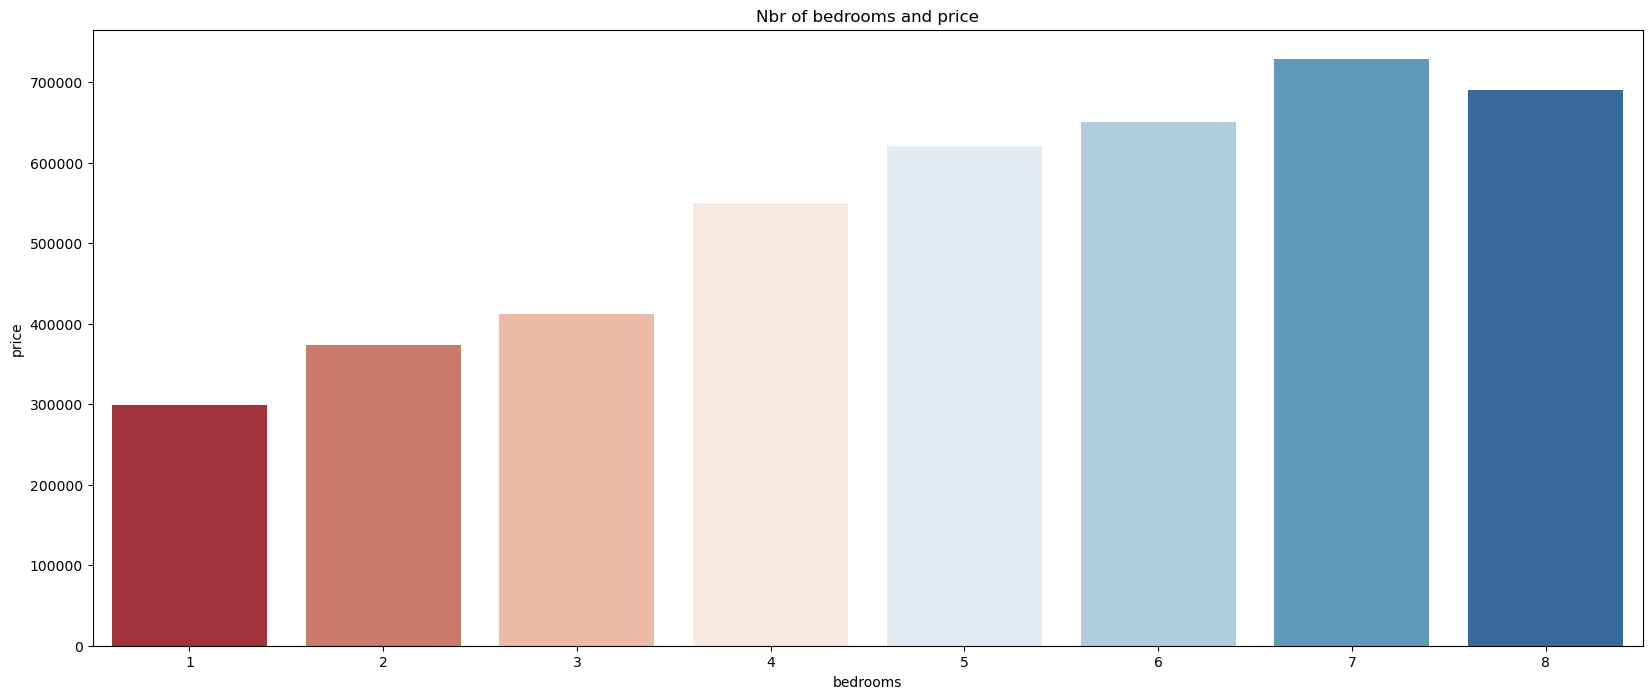

In [84]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Nbr of bedrooms and price')
sns.barplot(data=temp_df,x='bedrooms',y='price',ax=ax1,palette="RdBu")
plt.show()

# Conclussion
**1-** we can see that as the nbr of bedroom increase price also increse

In [85]:
temp_df=house.groupby(['bathrooms'])['price'].median().reset_index()
temp_df

,bathrooms,price
0,0.00,280000.0
1,0.50,264000.0
2,0.75,275000.0
3,1.00,320000.0
4,1.25,516500.0
5,1.50,370000.0
6,1.75,422650.0
7,2.00,423250.0
8,2.25,472250.0
9,2.50,499950.0


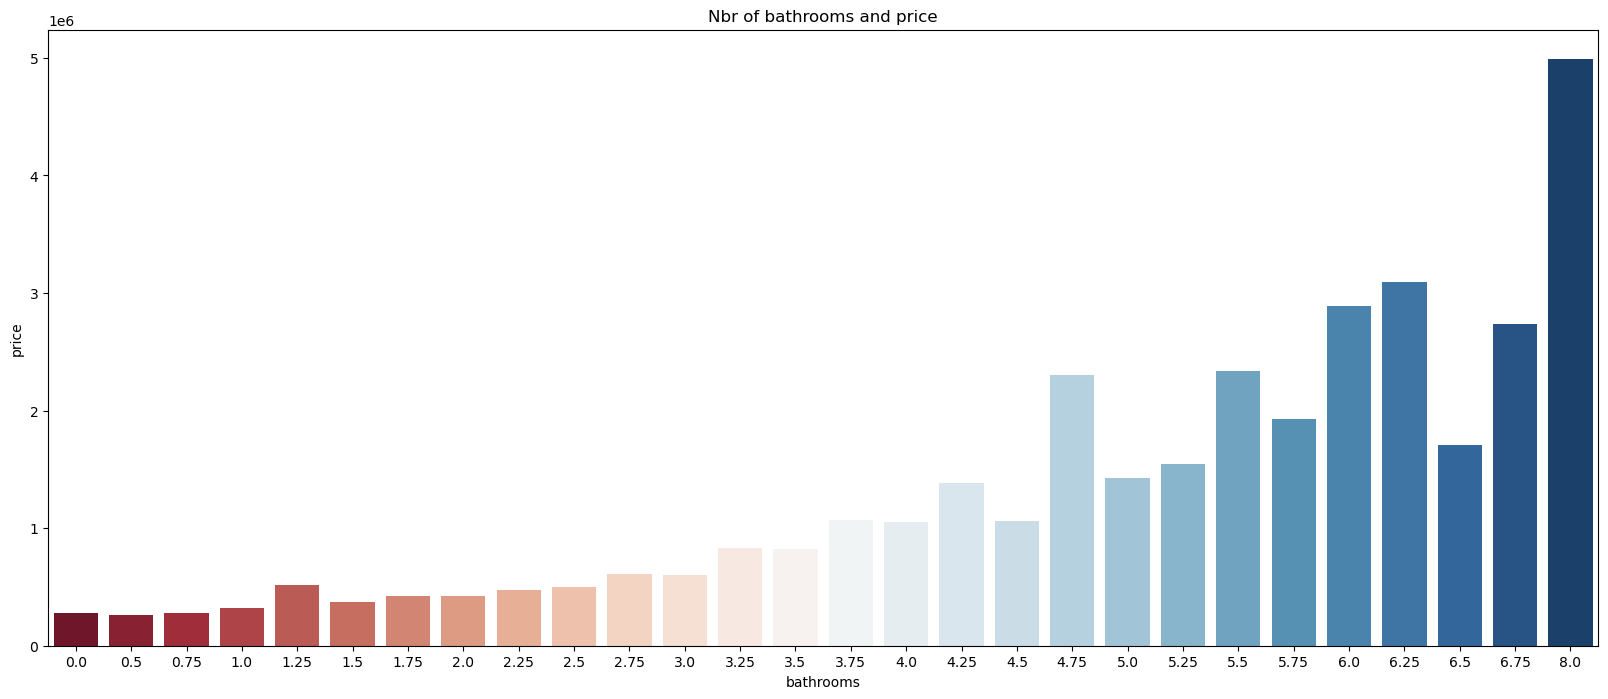

In [86]:
fig,(ax1)=plt.subplots(1,1,figsize=(20,8))
ax1.set_title('Nbr of bathrooms and price')
sns.barplot(data=temp_df,x='bathrooms',y='price',ax=ax1,palette="RdBu")
plt.show()

# Correlation

In [87]:
corr=house.corr()
corr['price']*100

price                100.000000
bedrooms              31.588523
bathrooms             52.473124
floors                25.758300
condition              3.623699
grade                 66.904774
sqft_above            60.317000
sqft_basement         32.383130
lat                   30.875051
long                   2.248566
total_sqft_living     69.433055
total_sqft_lot         9.391168
Name: price, dtype: float64

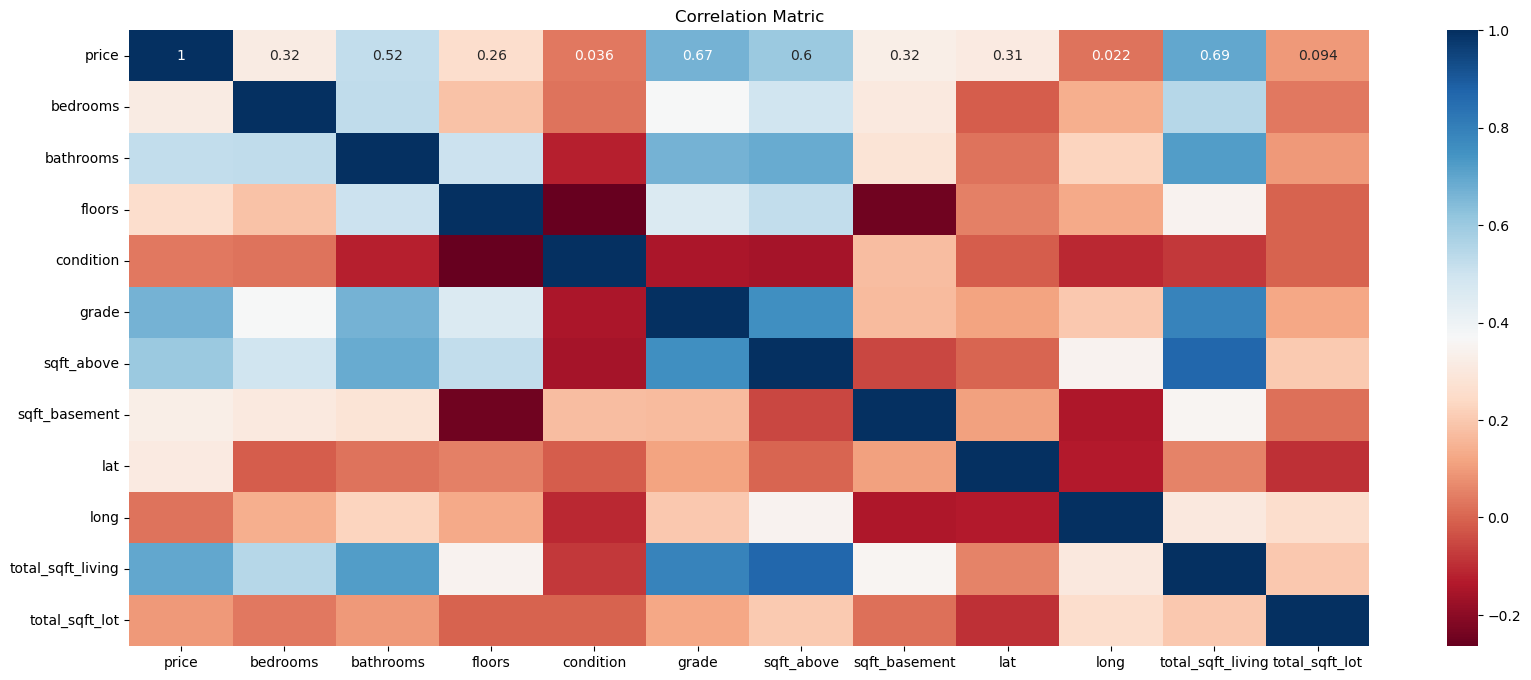

In [88]:
plt.figure(figsize=(20,8))
plt.title("Correlation Matric")
sns.heatmap(corr,annot=True,cmap="RdBu")
plt.show()

# Conclussion

we can see that these column have strong positive correlation
`Bathrooms (52.39%)`,
`Grade (66.88%)`,
`Sqft_above (60.33%)`,
`Total_sqft_living (69.46%)`

# Feature Selection

In [89]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler,FunctionTransformer

# Saperate Feature and label

In [90]:
feature=house.drop(columns='price')
label=house['price']

In [91]:
feature.head(1)

,bedrooms,bathrooms,floors,condition,grade,sqft_above,sqft_basement,lat,long,total_sqft_living,total_sqft_lot
0,3,1.0,1.0,3,7,1180,0,47.5112,-122.257,2520,11300


In [92]:
label.head(1)

0    221900.0
Name: price, dtype: float64

# Split the data

In [93]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=45)

In [94]:
x_train.shape

(17260, 11)

In [95]:
x_test.shape

(4315, 11)

# Build a pipeline for applying the variance threshold

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [99]:
scale=StandardScaler()
scale_x_train=scale.fit_transform(x_train)
sale_x_test=scale.transform(x_test)
scale_x_train

array([[-0.41208079, -0.79972944,  0.93914083, ..., -0.4741059 ,
        -0.70932391, -0.20995471],
       [-0.41208079,  0.50124418, -0.91794466, ...,  0.13684649,
        -0.62976989, -0.19995229],
       [-0.41208079,  0.50124418,  0.93914083, ...,  0.98933819,
         0.33813735,  0.2989051 ],
       ...,
       [-0.41208079,  0.17600078,  0.01059808, ...,  0.17236697,
        -0.22537029, -0.29845405],
       [ 0.70308297,  0.50124418,  0.93914083, ..., -0.56645917,
        -0.11266876, -0.14366774],
       [-0.41208079, -0.14924263, -0.91794466, ...,  1.15983653,
        -0.88832045, -0.20971112]])

In [1]:
sel=EFS(KNeighborsRegressor(n_neighbors=5),max_features=11,cv=5,scoring='r2')
sel.fit(scale_x_train,y_train)

NameError: name 'EFS' is not defined

In [102]:
sel.best_score_

0.6299552557263257

In [103]:
sel.best_feature_names_

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [104]:
df=pd.DataFrame(sel.get_metric_dict()).T

In [105]:
df.sort_values(by='avg_score',ascending=False,inplace=True)

In [106]:
temp=df[['avg_score','feature_names']].head(10)
temp

,avg_score,feature_names
2035,0.629955,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)"
2046,0.629931,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)"
2016,0.629912,"(0, 2, 3, 4, 5, 6, 7, 8, 9)"
2044,0.629886,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10)"
1927,0.629426,"(0, 3, 4, 5, 6, 7, 8, 9)"
2024,0.62941,"(0, 3, 4, 5, 6, 7, 8, 9, 10)"
2008,0.629375,"(0, 1, 3, 4, 5, 6, 7, 8, 9)"
2043,0.629359,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)"
1980,0.627168,"(0, 1, 2, 3, 4, 5, 6, 7, 8)"
1899,0.627161,"(0, 2, 3, 4, 5, 6, 7, 8)"


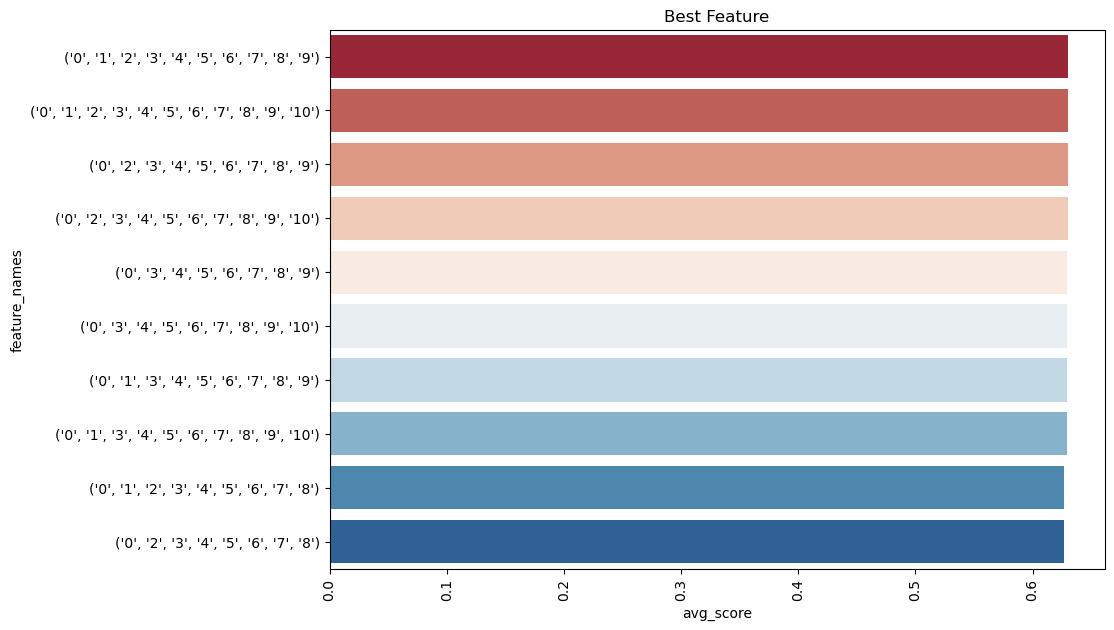

In [107]:
plt.figure(figsize=(10,7))
plt.title("Best Feature")
sns.barplot(y=temp['feature_names'],x=temp['avg_score'],palette="RdBu")
plt.xticks(rotation='vertical')
plt.show()